# Practical 4: Modules and Functions - Building Conway's Game of Life

<div class="alert alert-block alert-success">
<b>Objectives:</b> In this practical we continue to use functions, modules and conditional statements. We also continue practicing how we access entries from 2D arrays. At the end of this notebook you will have a complete version of Conway's Game of Life which will produce an animation. This will be done through 3 different sections, each of which has an exercise for you to complete:
    
 - 1) [Creating different shapes through 2D Numpy array modifications](#Part1)
      * [Exercise 1: Draw still 'life' from Conway's Universe](#Exercise1)
      * [Exercise 2: Draw oscillators and space-ship 'life' from Conway's Universe](#Exercise2)
 - 2) [Creating a function that searches a local neighbourhood for values of '1' and '0'](#Part2)
      * [Exercise 3: Implement the 4 rules of life](#Exercise3)
      * [Exercise 4: Loop through 20 oscillations of the 'Beacon' lifeform](#Exercise4)
 - 3) [Populating Conway's Universe with multiple species](#Part3)
 
As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

<div class="alert alert-block alert-warning">
<b>Please note:</b> After reading the instructions and aims of any exercise, search the code snippets for a note that reads -------'INSERT CODE HERE'------- to identify where you need to write your code 
</div>

# Introduction: The game

Before we get our teeth into the exercises included in this notebook, let's remind ourselves about the basis for Conway's game of life. In Conway's game of life, the Universe is represented as a 2D space [a 2D Numpy array in our case!] on which each cell can either be alive or dead. If we refer to each cell as having one of two states, we can represent this numerically as each cell having either a value of 1 or 0. If we then assume we can draw 2D shapes that represent a 'specie', as a collection of live cells, we might find patterns changing over time.

Every cell interacts with its neighbours, whether they are horizontally, vertically of diagonally adjacent. There are 4 laws that define these interactions:

<div class="alert alert-block alert-info">
    
 - Any live cell with fewer than two live neighbours dies, as if by underpopulation.
    
 - Any live cell with two or three live neighbours lives on to the next generation.
 
 - Any live cell with more than three live neighbours dies, as if by overpopulation.
 
 - Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
</div>

So, imagine we are at the beginning of time in our 2D Universe. We need to check the status of every cell and make changes according to these laws. After one sweep through our 2D space, or time step, the status of individual cells will change. Numerically, the distribution of '1's and '0's change across our 2D space. In fact, by defining species as dinstinct groups of cells of a certain shape, as we move through multiple time steps we find 3 types of patterns emerging:

<div class="alert alert-block alert-info">
    
 - Still life: These patterns remain fixed on the board
 
 - Oscillators: These patterns change shape on every iteration, but return to their initial state after a number of generations.
 
 - Space-ships: These patterns end up moving across the board according to the rules that define life and death.
</div>

From a programming perspective, implementing these rules through any number of time steps requires a number of procedures to be implemented via code:

<div class="alert alert-block alert-info">

 - 1) Defining 2D arrays that represent species in Conway's Universe. 
 - 2) Creating a function that searches the immediate neighbouring space of each cell for 1's and 0's.
 - 3) Counting the number of 1's and 0's according to the previous point.
 - 4) Changing the values of each cell according to the 4 laws stated above.
 - 5) Looping through points 2-4 for any number of time steps.

</div>


By sequentially following the proceeding exercises, we will eventually build a variant of Conway's game of life.

## Creating different shapes through 2D Numpy array modifications <a name="Part1"></a>

Before we can run a simulation, let's create distinct species as groups of cells, and thus patterns. This will help us practice creating 2D arrays and populating each cell with either a '0' or '1' depending on what pattern we want to draw. To generate and thus draw each specie you will be asked to initialise a 2D Numpy array that repeats the pattern seen in the picture. The code to plot, thus visualise, each pattern is given for you.

### Still life 

The pictures in Figure 1 and 2 illustrate common types of still life in Conway's Universe. Ive given you some code that reproduces the pattern for 'Block', in the code box below. Read through the code and comments and see if this makes sense. 

![](https://github.com/loftytopping/DEES_programming_course/blob/master/images/Practical_3_figure1.png?raw=true)
<h3><center>Figure 1</center></h3>

![](https://github.com/loftytopping/DEES_programming_course/blob/master/images/Practical_3_figure2.png?raw=true)
<h3><center>Figure 2</center></h3>

An empty array [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
A finished array [[0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]]
None


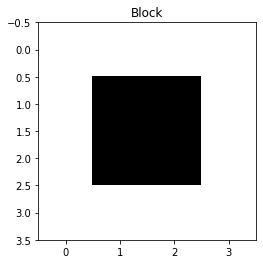

In [1]:
#%matplotlib inline #this is to help us retrieve those love animations!

import numpy as np #import the numerical python library, numpy. Changing the referenced library to 'np' is solely for convenience
import matplotlib.pyplot as plt #as per the above, much easier to write over and over again 
from matplotlib import animation, rc

# Lets first create our 'Block'. Dont forget, we can call our arrays and matrices anything we want. In this case Im going to use the name of the pattern we are interested in
Block = np.zeros((4,4),dtype=int) #Im telling the Python interpreter I want a numpy array that is 4 rows by 4 columns, contains '0' for now and is expecting my data to be of integer type
# What does this look like?
print("An empty array",Block)
# Can you see a matrix of 0s?

# Ok cool. Now lets add some black cells by position some values of 1. For the Block pattern, this is done as follows:
Block[1,1]=1
Block[1,2]=1
Block[2,1]=1
Block[2,2]=1
# Remeber how we refer to elements in an array in Python? Everything starts at 0, so here im filling in the central 2x2 matrix with 1s. Lets check this out numerically:
print(print("A finished array",Block))

#Now lets plot this to recreate the patterns given in figure x. 
plt.imshow(Block, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Block')
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 1: Draw still 'life' from Conway's Universe. </b> <a name="Exercise1"></a>

In this exercise you will need to create a 2D Numpy array that essentially 'draws' both the *Tub* and *Boat* specie from figure 2. 

</div>

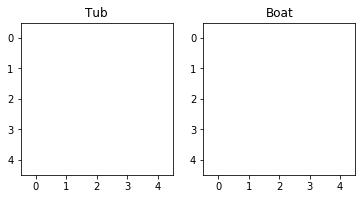

In [2]:
# We have already imported both Numpy and Matplotlib so no need to import those again.
# Initialise our matrices
Tub = np.zeros((5,5),dtype=int)
Boat = np.zeros((5,5),dtype=int)

#-------'INSERT CODE HERE'-------
# Now add '1's to the currently empty 2D array Tub



#--------------------------------

plt.subplot(1, 2, 1).imshow(Tub, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Tub')
#plt.show()

#-------'INSERT CODE HERE'-------
# Now add '1's to the currently empty 2D array Boat



#--------------------------------

plt.subplot(1, 2, 2).imshow(Boat, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Boat')
plt.show()


<div class="alert alert-block alert-success">
<b> Exercise 2: Draw oscillators and space-ship 'life' from Conway's Universe. </b> <a name="Exercise2"></a>

Following exercise #1,now do the same for 2 types of both *oscillators* and *space ships*: Toad, Beacon, Glider and Light-weight spaceship (LWSS). Can you replicate the patterns shown in figures 1 and 3? Check the size of each array you need, accounting for white space around the outside. Use the space below and copy-paste the code we have already used.

![](images/Practical_3_figure3.png "Title") 
<h3><center>Figure 3</center></h3>

</div>

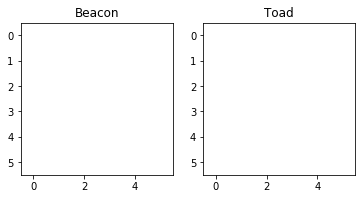

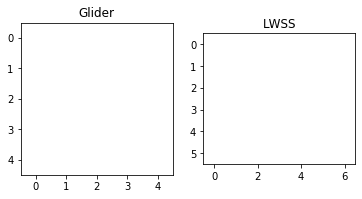

In [3]:
#Enter the Python code here to create and then visualise a Toad, Beacon and Glider

#Initialise each matrix
Beacon = np.zeros((6,6),dtype=int)
Toad = np.zeros((6,6),dtype=int)
Glider = np.zeros((5,5),dtype=int)
LWSS = np.zeros((6,7),dtype=int)

#Enter values for '1' where you would like a black square
#-------'INSERT CODE HERE'-------





#--------------------------------


#Now visualise your results. 

plt.subplot(1, 2, 1).imshow(Beacon, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Beacon')
plt.subplot(1, 2, 2).imshow(Toad, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Toad')
plt.show()

plt.subplot(1, 2, 1).imshow(Glider, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Glider')
plt.subplot(1, 2, 2).imshow(LWSS, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('LWSS')
plt.show()

## Creating a function that searches a local neighbourhood for values of '1' and '0' <a name="Part2"></a>

Now we know how to define a specie by modifying values in a 2D array, we also need to now create a function that can search the neighbouring space of any cell for the occurance of '1's or '0's. We are going to perform this operation many times so creating a function to do this seems a sensible approach.

As an example, let's re-create the 2D array that represents the specie 'Beacon' and then pass this array into a new function that will search the neighbouring space of every cell to detect a '1' or '0. In this example I have given you all of the code to perform this operation. Try to understand the syntax used. Does this make sense? First look at the code and then let's formulate the steps in the function as a narrative.

In [4]:
#Initialise the Beacon matrix
Beacon = np.zeros((6,6),dtype=int)

#Enter values for '1' where you would like a black square
Beacon [1,1]=1
Beacon [1,2]=1
Beacon [2,1]=1
Beacon [3,4]=1
Beacon [4,3]=1
Beacon [4,4]=1

# Now define a function that moves through through each cell in our 2D array and searches the neighbouring space 
# We pass three variables:
# rows - Number of rows in our space to be searched
# cols - Number of columns in our space to be searched
# space - The 2D array space to be searched
def search_each_cell(total_rows,total_cols,space):
    
    # 1) First, we need to start moving through each cell of our 'space'.
    #    To do this, we will use two nested 'for' loops
    for row in range(total_rows):
        for col in range(total_cols):
            # So 'row' and 'col' define our current cell.
            # We now need to search a neighbourhood defined as 1 cell distance around this position
            # We thus need two more nested for loops. When searching this neighbouring space, we want
            # to count the number of 1's. Thus we also need a variable that we can increment by 1 
            # everytime we find a value of 1. Lets call this integer variable count
            count = 0
            for row2 in range(row-1,row+2): # See here that we can define a start and end to our 'range'
                for col2 in range(col-1,col+2): 
                     # We need to check if our new position, defined by [row2,col2] is off the board
                    if (row2<0) or (row2>=total_rows) or (col<0) or (col2>=total_cols):
                        # Do nothing
                        pass
                    elif row2 == row and col2 == col:
                        # Do nothing, its the cell we already have!
                        pass
                    # If we are not off the board or in the same cell as our starting point...
                    # We can check if this new space has a value of 1. It it does, lets count it
                    else:
                        if space[row2,col2]>0:
                            count=count+1
    
    return # At the moment we are not returning anything. Seem odd? We will get back to this.

# call the above function
search_each_cell(6,6,Beacon)

print("Finished function call, nothing to report!")

Finished function call, nothing to report!


Now let's try to understand what this function is actually doing. As an algorithm, we have the following steps

<div class="alert alert-block alert-info">
    
 - 1) Pass the 2D Numpy array to the new function along with variables that define the total number of rows and columns
 
 - 2) We need to move through every cell and search its local neighbourhood. Moving through each cell is defined by the first two loops that cycle through both the row and column index of our 2D space. The limits are defined by the variables total_rows and total_cols
 
 - 3) For each cell, we will want to have an integer variable that counts how many 1's there are in the local neighborhood. We need to initialise this to 0 for each cell we move through. We call this variable <code> count </code>
 
 - 4) Now we need to look at the local space surrounding our cell. For this we need two more nested loops that look 1 row above, 1 row below, 1 column to the left and one to the right.
 
 - 5) As we move through this neighborhood we need to check if we are either off the board OR in the same location as the cell we are interested in!
 
 - 6) If none of the above is true, then check if a cell has a value greater then 0. If it does, increment variable <code> count </code> by 1.
 
 - 7) For each cell on the board, repeat steps 3-6.
 
 - 8) When the entire space has been searched, stop the function and return nothing.
 
</div>



<div class="alert alert-block alert-success">
<b> Exercise 3 - Implement the 4 rules of life  <a name="Exercise3"></a>  </b> 

Now we have the function that can search the local neighbourhood of any cell and count how many 1s and 0's there are, we can now add on more code that can implement the 4 rules of life and thus keep the value of our current cell or change it. Let's remind ourselves what those rules are:

<div class="alert alert-block alert-info">
    
 - Any live cell with fewer than two live neighbours dies, as if by underpopulation.
    
 - Any live cell with two or three live neighbours lives on to the next generation.
 
 - Any live cell with more than three live neighbours dies, as if by overpopulation.
 
 - Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
</div>

So in this exercise we have a shape that has been passed into our function, and then create a new shape according to the rules of life. In the exercise you will need to add a series of conditional statements that populate the value of cells in our new shape according to these rules. In other words, we can re-write the above rules as:

<div class="alert alert-block alert-info">
    
 - If our current cell is alive [=1]:
 
   a) If count < 2, current cell = 0 [it dies].
    
   b) If 2<=count<=3, current cell = 1 [it stays alive].
   
   c) If count>3, current cell = 0 [it dies]
   
 
 - If our current cell is dead [=0]
 
   a) If count == 3, current cell = 1 [born]
   
</div>

Notice the syntax I have used for the last conditional: <code> If count == 3 </code>? When checking a value we use two equals signs <code> == </code> as we are not *assigning* a value as we would in, e.g. <code> x = 4 </code>. In the code snippet below, I have identified where you need to implement these rules. Notice that we plot the 'Beacon' pattern before we call the function and then the new 2D space which should change the pattern. With this in mind, also note that our function new returns a new version of our 2D space which I have called 'new_space'. If correct, when you run your completed code you should see figure 4.

![](images/Practical_3_figure4.png "Title") 
<h3><center>Figure 4</center></h3>

Please note that where I have added 'INSERT CODE HERE' we are using the correct indentation.

</div>

In [5]:
#Initialise the Beacon matrix
Beacon = np.zeros((6,6),dtype=int)

#Enter values for '1' where you would like a black square
Beacon [1,1]=1
Beacon [1,2]=1
Beacon [2,1]=1
Beacon [3,4]=1
Beacon [4,3]=1
Beacon [4,4]=1

# Now define a function that moves through through each cell in our 2D array and searches the neighbouring space 
# We pass three variables:
# rows - Number of rows in our space to be searched
# cols - Number of columns in our space to be searched
# space - The 2D array space to be searched
def search_each_cell(total_rows,total_cols,space):
    new_space = np.zeros((total_rows,total_cols),dtype=int)
    # 1) First, we need to start moving through each cell of our 'space'.
    #    To do this, we will use two nested 'for' loops
    for row in range(total_rows):
        for col in range(total_cols):
            # So 'row' and 'col' define our current cell index.
            # We now need to search a neighbourhood defined as 1 cell distance around this position
            # We thus need two more nested for loops. When searching this neighbouring space, we want
            # to count the number of 1's. Thus we also need a variable that we can increment by 1 
            # everytime we find a value of 1. Lets call this integer variable count. 
            count = 0
            for row2 in range(row-1,row+2): # See here that we can define a start and end to our 'range'
                for col2 in range(col-1,col+2): 
                     # We need to check if our new position, defined by [row2,col2] is off the board
                    if (row2<0) or (row2>=total_rows) or (col<0) or (col2>=total_cols):
                        # Do nothing
                        pass
                    elif row2 == row and col2 == col:
                        # Do nothing, its the cell we already have!
                        pass
                    # If we are not off the board or in the same cell as our starting point...
                    # We can check if this new space has a value of 1. It it does, lets count it
                    else:
                        if space[row2,col2]>0:
                            count=count+1
            #-------'INSERT CODE HERE'-------
            # Here you need to introduce conditional statements that act on the value of 'count'
            # Read through the narrative provided above and remember to obey the spacing rules 
            # You will need to check the value of space[row,col] and then, depending on whether
            # this is greater than 0 OR equals to 0, implement the rules of life. I have provided
            # the first example. Please do try to complete this.
            if space[row,col] > 0:
                
                
            elif space[row,col] == 0:
                
                
                
            #--------------------------------
                    
    
    return new_space

# call the above function
Beacon_new = search_each_cell(6,6,Beacon)

print("Finished function call, now lets compare our pattern before and after...")
#Now visualise your results. 

plt.subplot(1, 2, 1).imshow(Beacon, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Beacon - before')
plt.subplot(1, 2, 2).imshow(Beacon_new, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Beacon - after')
plt.show()

IndentationError: expected an indented block (<ipython-input-5-b4e96637cbd8>, line 52)

<div class="alert alert-block alert-success">
<b> Exercise 4 - Loop through 20 oscillations of the 'Beacon' lifeform <a name="Exercise4"></a>  </b>  

Now that we have build the function that can implement the 4 rules of life, all that is left for us to do is to call this function a set number of times to simulate evolution across our Universe. In the code box below, drop your conditional statements from above in the relevant place and click 'Run'. Do you see the Beacon shape oscillating? As before, I have provided the code for plotting but see if the syntax makes sense.

</div>

In [ ]:
import numpy as np #import the numerical python library, numpy. Changing the referenced library to 'np' is solely for convenience
import matplotlib.pyplot as plt #as per the above, much easier to write over and over again 
from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import clear_output
import time

#Initialise the Beacon matrix
Beacon = np.zeros((6,6),dtype=int)

#Enter values for '1' where you would like a black square
Beacon [1,1]=1
Beacon [1,2]=1
Beacon [2,1]=1
Beacon [3,4]=1
Beacon [4,3]=1
Beacon [4,4]=1

# Now define a function that moves through through each cell in our 2D array and searches the neighbouring space 
# We pass three variables:
# rows - Number of rows in our space to be searched
# cols - Number of columns in our space to be searched
# space - The 2D array space to be searched
def search_each_cell(total_rows,total_cols,space):
    new_space = np.zeros((total_rows,total_cols),dtype=int)
    # 1) First, we need to start moving through each cell of our 'space'.
    #    To do this, we will use two nested 'for' loops
    for row in range(total_rows):
        for col in range(total_cols):
            # So 'row' and 'col' define our current cell index.
            # We now need to search a neighbourhood defined as 1 cell distance around this position
            # We thus need two more nested for loops. When searching this neighbouring space, we want
            # to count the number of 1's. Thus we also need a variable that we can increment by 1 
            # everytime we find a value of 1. Lets call this integer variable count
            count = 0
            for row2 in range(row-1,row+2): # See here that we can define a start and end to our 'range'
                for col2 in range(col-1,col+2): 
                     # We need to check if our new position, defined by [row2,col2] is off the board
                    if (row2<0) or (row2>=total_rows) or (col<0) or (col2>=total_cols):
                        # Do nothing
                        pass
                    elif row2 == row and col2 == col:
                        # Do nothing, its the cell we already have!
                        pass
                    # If we are not off the board or in the same cell as our starting point...
                    # We can check if this new space has a value of 1. It it does, lets count it
                    else:
                        if space[row2,col2]>0:
                            count=count+1
            #-------'INSERT CODE HERE'-------
            # Here you need to introduce conditional statements that act on the value of 'count'
            # Read through the narrative provided above and remember to obey the spacing rules 
            if space[row,col] > 0:
            
            
            elif space[row,col] == 0:
            
            
            
            #--------------------------------
                    
    
    return new_space

fig, ax2 = plt.subplots()
plt.imshow(Beacon, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Beacon oscillating')
plt.show()

# Let us call the function 20 times
# Each time we are given a new shape to plot on our figure. 
# Wait 0.2 seconds before moving on to thje next iteration
# We shpuld see oscillating behaviour.
for x in range(20):
    clear_output(wait=True)
    Beacon_new = search_each_cell(6,6,Beacon)
    Beacon = Beacon_new
    plt.imshow(Beacon_new, cmap='binary') #The cmap, or colour map, gives us a black and white board.
    plt.title('Beacon oscillating')
    plt.show()
    time.sleep(0.2)

## Populating Conway's Universe with multiple species <a name=#Part3></a>

Now we are going to use the defintion of our shapes to populate a miniature Universe in 2D space! Once we have this, following the same procedure as above, we should see some interesting movement! So let's create a space that is big enough for all of our cell types. To do this, we need to create another matrix:

In [ ]:
Universe=np.zeros((50,50),dtype=int)
print(Universe)

You should now see a snapshot of the Universe matrix that is empty. How do we populate our Universe with individual species? We could enter a value for each cell but this is laborious. Rather, we are going to use our existing matrices that define our species and place them on the Universe grid. We do that by definining the exact space in the Universe we want our cells to go. This is practice in recognising the correct shape of an array/matrix and matching one to another. For example, look at the code below which places the top left corner of an LWSS on the cell in the 12th row and 13th column of my Universe and then visualises the results. Dont forget, indexing in Python starts at 0 so for the 12th row and 13th column, I need to refer to element [11,12]. Im also using the operator <code> : </code> which allows us to straddle cells bound by a start and a finish. Why have I chosen the range given below? Feel free to change the values, but if you get the size of space needed to fit in an LWSS, Python will complain it cannot broadcast a given shape:

In [ ]:
#Define the space in the Universe you would like your LWSS to appear
Universe[11:17,12:19] = LWSS
#Now visualise our Universe
plt.imshow(Universe, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Universe [with 1 LWSS]')
plt.show()

To finish this notebook, in the following code box we fill the Universe with a range of species and then run a simulation. Can you see how we have mapped species shapes into our Universe? It is left for you to copy the working function 'search_each_cell' from above to complete the simulation.

Have a play with this! What happens if you increase the number of iterations to 300? Please note, we might want to clear our Universe from the above exercise, in which case we could write: Universe[:,:]=0, but let's keep it in for now. 

In [ ]:
#Define the space in the Universe you would like your different species to appear
Universe[30:36,32:39] = LWSS
Universe[11:17,12:19] = LWSS
Universe[22:28,12:18] = Beacon
Universe[33:39,2:8] = Beacon
Universe[19:25,32:38] = Toad
Universe[1:6,1:6] = Glider
Universe[6:11,25:30] = Boat
plt.imshow(Universe, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Universe [with multiple cell types]')
plt.show()

#-------'INSERT CODE HERE'-------
def search_each_cell(total_rows,total_cols,space):

    
    
#--------------------------------


fig, ax2 = plt.subplots(figsize=(12, 12))
plt.imshow(Universe, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Universe simulation')
plt.show()

for x in range(100):
    clear_output(wait=True)
    Universe_new = search_each_cell(50,50,Universe)
    Universe = Universe_new
    plt.imshow(Universe_new, cmap='binary') #The cmap, or colour map, gives us a black and white board.
    plt.title('Universe simulation')
    plt.show()
    time.sleep(0.2)
